In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,MaxAbsScaler,StandardScaler,RobustScaler,PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor

In [2]:
#Load the Data Set and display the first 5 rows
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data Description**:
Break down the dataset in detail, describing what each column represents:

**RowNumber**: A unique identifier for each row in the dataset.

**CustomerId**: Unique customer identification number.

**Surname**: The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).

**CreditScore**: The customer's credit score at the time of data collection.

**Geography**: The customer's country or region, providing insights into location-based trends in churn.

**Gender**: The customer's gender.

**Age**: The customer's age, valuable for demographic analysis.

**Tenure**: The number of years the customer has been with the bank.

**Balance**: The customer's account balance.

**NumOfProducts**: The number of products the customer has purchased or subscribed to.

**HasCrCard**: Indicates whether the customer has a credit card (1) or not (0).

**IsActiveMember**: Indicates whether the customer is an active member (1) or not (0).

**EstimatedSalary**: The customer's estimated salary.

**Exited**: The target variable, indicating whether the customer has churned (1) or not (0).

This dataset is primed for exploratory data analysis, customer segmentation, predictive modeling to churn behaviour,
and the development of customer retention strategies. It offers rich insights for business strategists, data scientists, and researchers interested in improving customer loyalty and reducing churn rates.

In [3]:
#Display the data info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Count Rows and Columns 
print(f' Rows: {data.shape[0]}')
print(f' Columns: {data.shape[1]}')

 Rows: 10000
 Columns: 14


## Descriptive Statistics

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Inferences: 
1. The Credit score ranges from 350 to 850.
2. The minimum age is 18 and the max age is 92.
3. The tenure with the bank is from 0 to 10 years.
4. The number of products bank offers is 4.

In [6]:
data.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


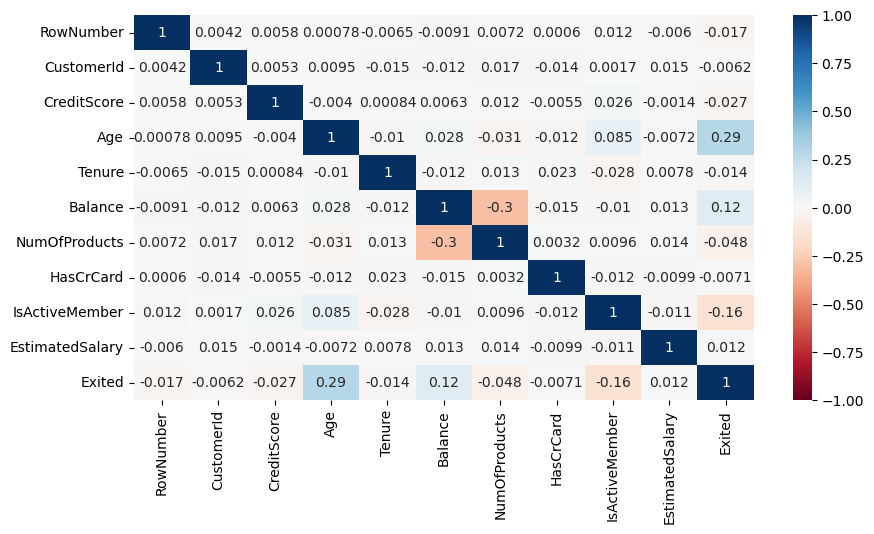

In [7]:
# Explore the Correlation among numerical columns
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True),vmin=-1,vmax=1,annot=True,cmap='RdBu')
plt.show()

Inferences:Data shows no correlation among numerical columns

## Univariate Analysis

In [8]:
data.columns

num_cols =  ['CreditScore','Age','EstimatedSalary','Balance']
cat_cols =  ['Geography','Gender','Tenure','NumOfProducts', 'HasCrCard','IsActiveMember','Exited']

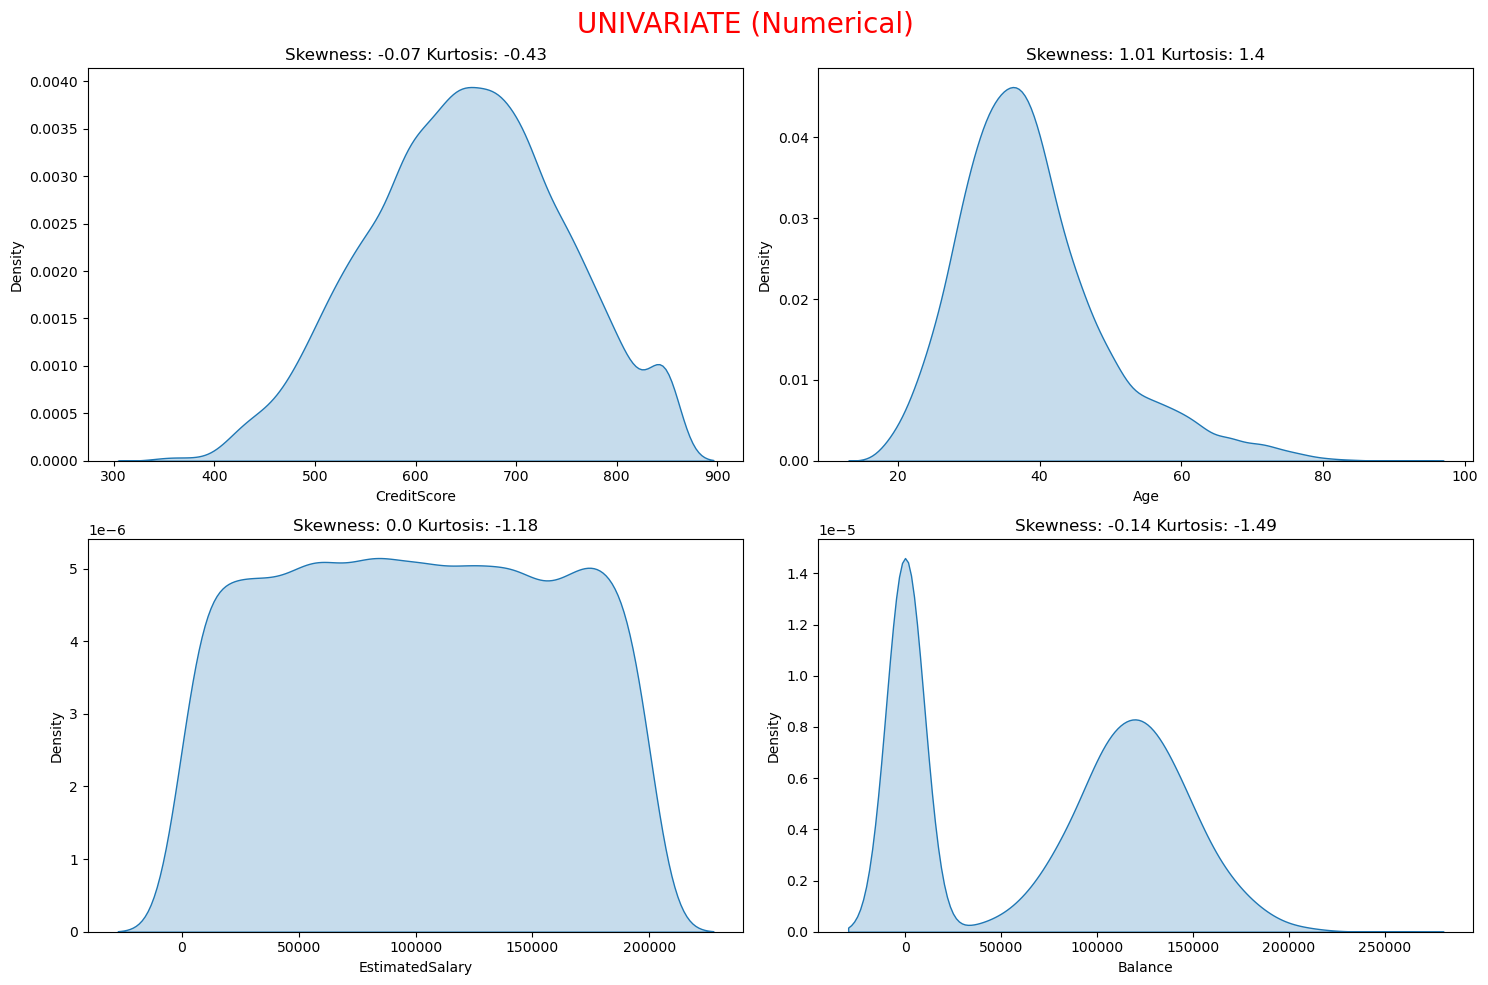

In [9]:
plt.figure(figsize=(15,10))
t=1
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=20)
for i in num_cols:
    s,k=data[i].skew(),data[i].kurt()
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(s,2)} Kurtosis: {round(k,2)}')
    t+=1
plt.tight_layout()
plt.show()

Inferences:
* Most of the customers have Balance zero

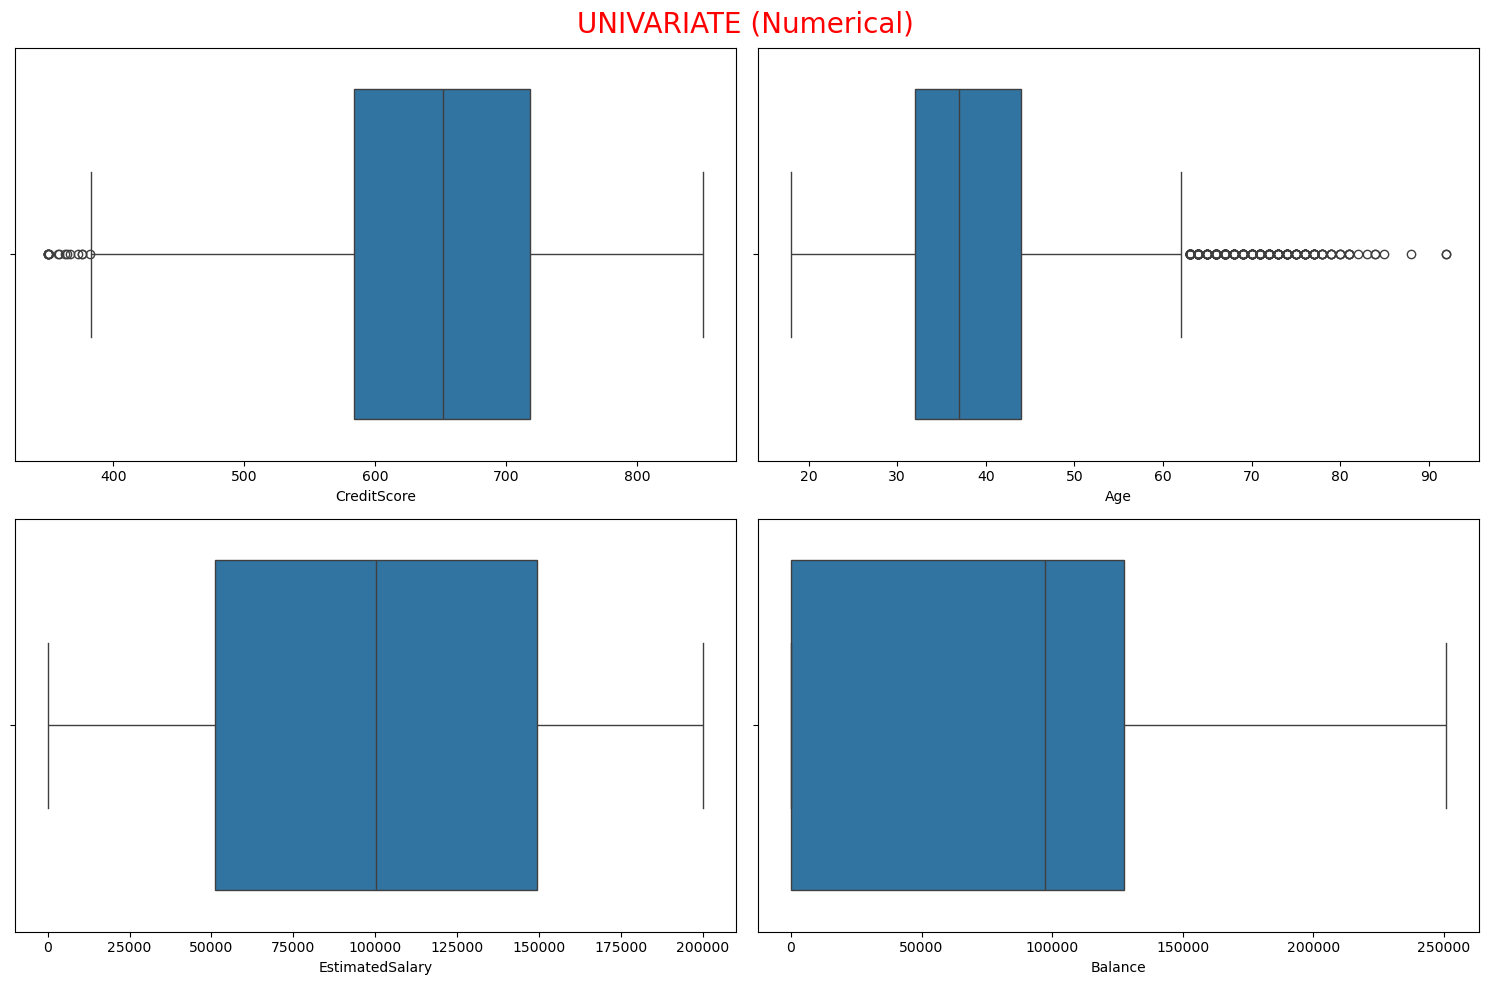

In [10]:
#Exploring through Boxplot
plt.figure(figsize=(15,10))
t=1
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=20)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,x=i)    
    t+=1
plt.tight_layout()
plt.show()

Inferences:

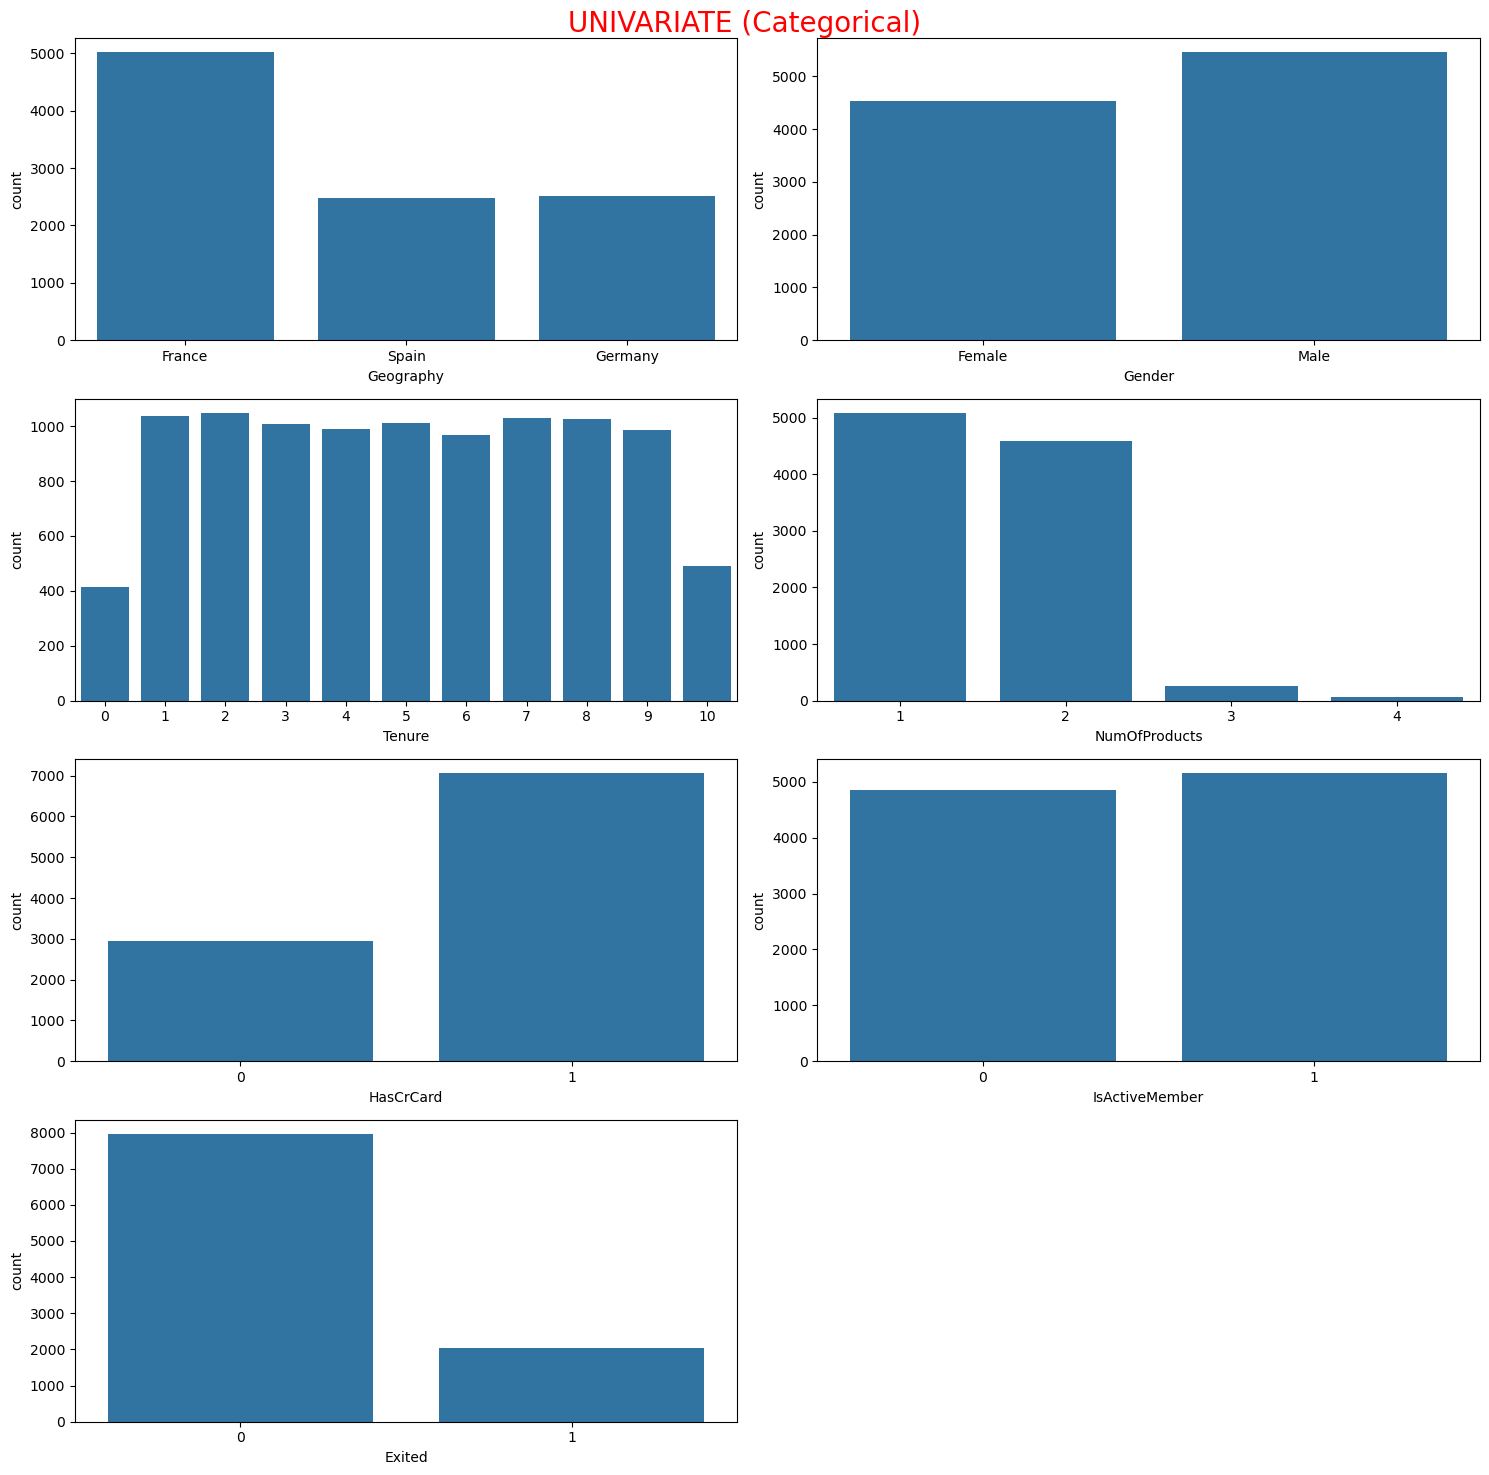

In [11]:
# Explore categorical columns
plt.figure(figsize=(15,15))
t=1
plt.suptitle('UNIVARIATE (Categorical)',color='red',size=20)
for i in cat_cols:    
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

Inferences:

## Bivariate Analysis

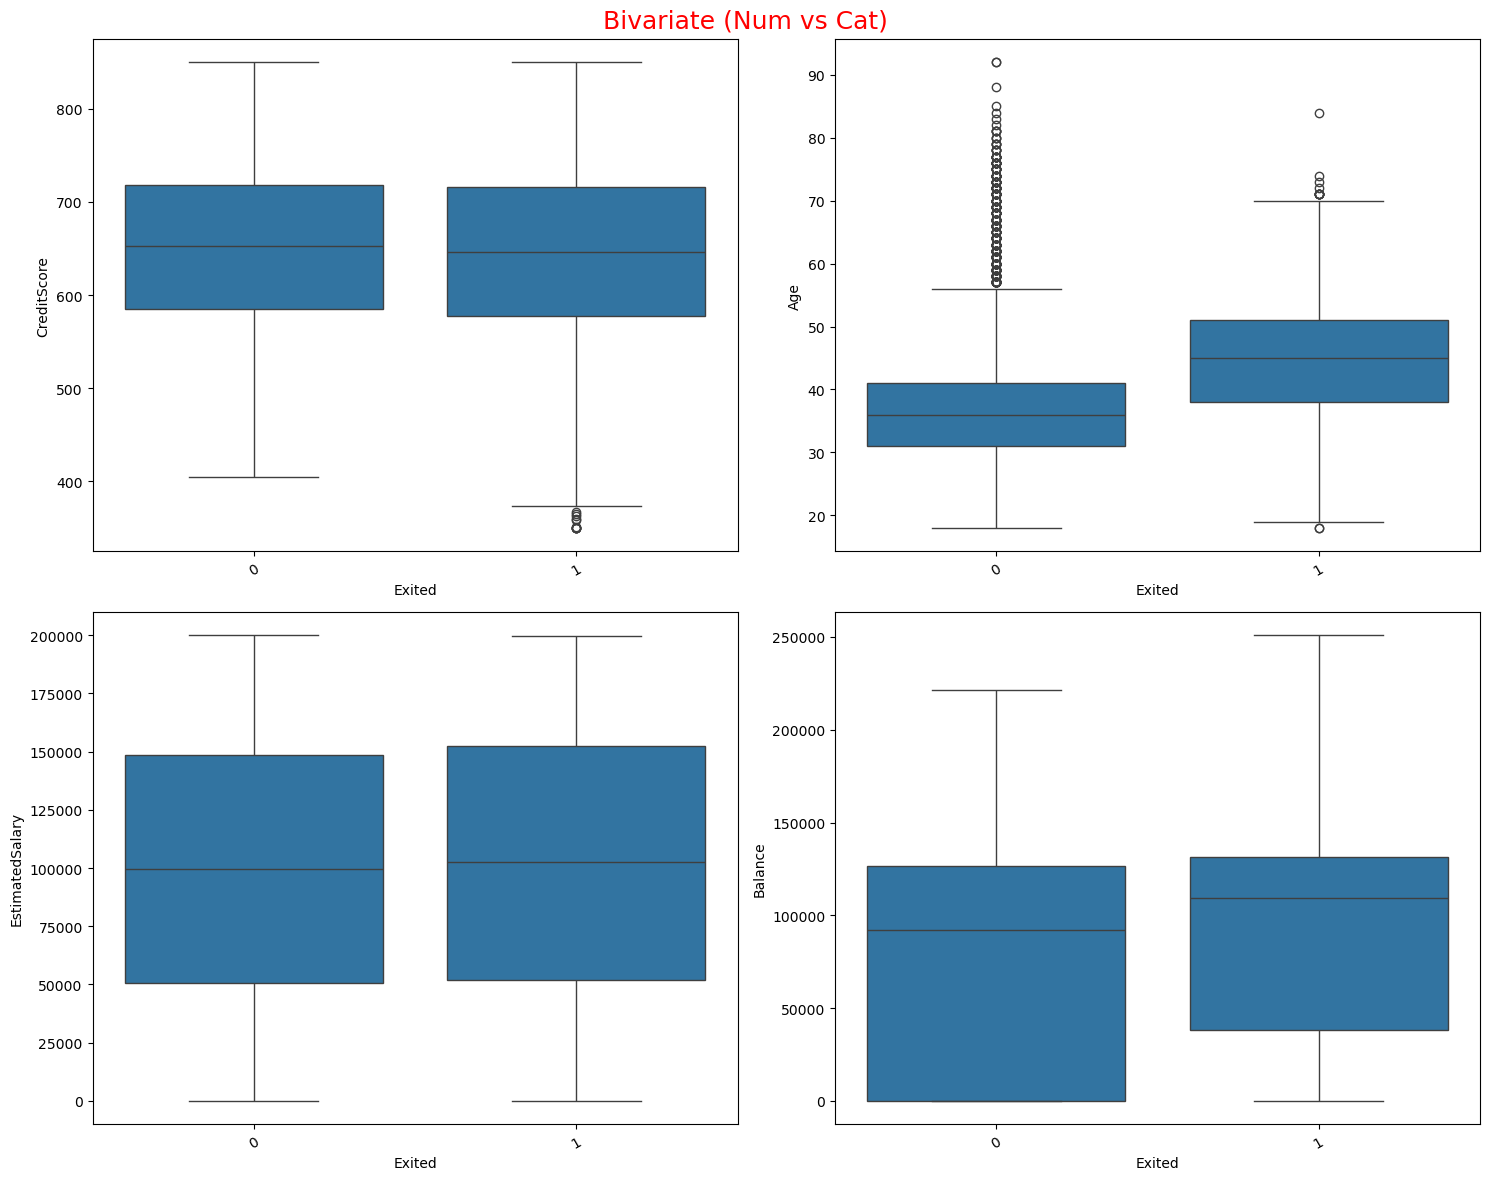

In [12]:
#lets  explore the relation as all numerical columns with 'Exited'
t = 1
plt.figure(figsize=(15,12))
plt.suptitle('Bivariate (Num vs Cat)',color='red',size=18)
for i in num_cols:
    if i!= 'Exited':
        plt.subplot(2,2,t)
        sns.boxplot(data=data,x='Exited',y=i)
        plt.xticks(rotation=30) #this is to rotate the values below the graps
        t+=1
plt.tight_layout()
plt.show()

Infereces:

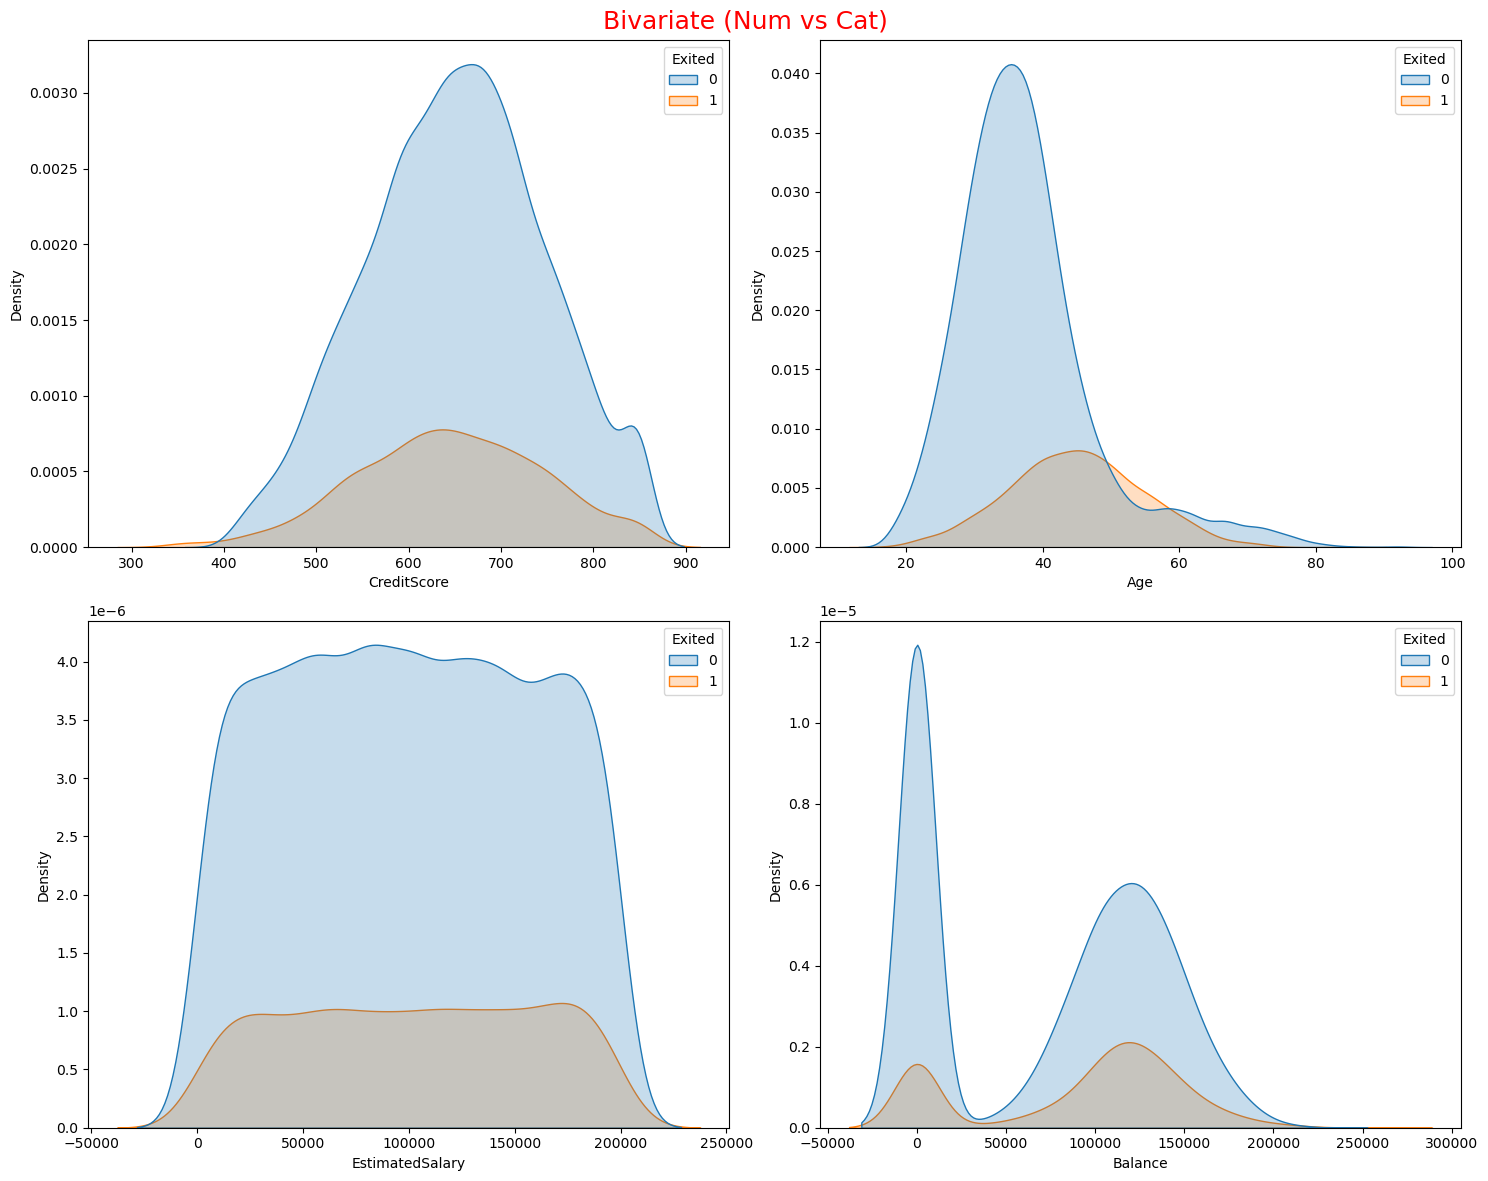

In [13]:
t = 1
plt.figure(figsize=(15,12))
plt.suptitle('Bivariate (Num vs Cat)',color='red',size=18)
for i in num_cols:
    if i!= 'Exited':
        plt.subplot(2,2,t)
        sns.kdeplot(data=data,hue='Exited',x=i,fill=True)
        t+=1
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

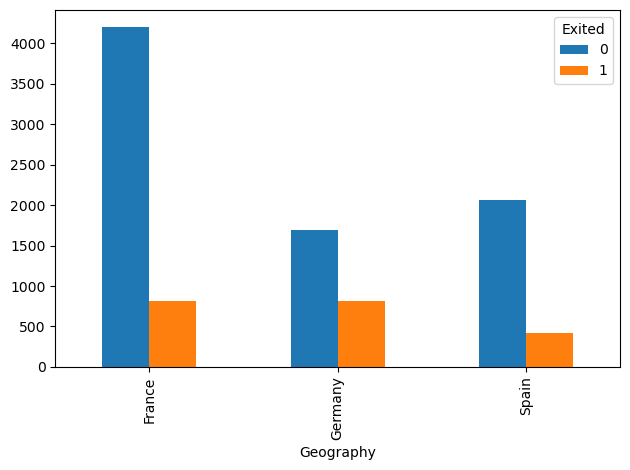

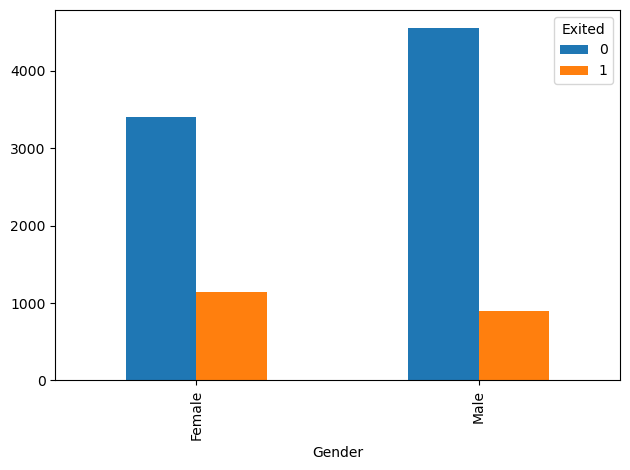

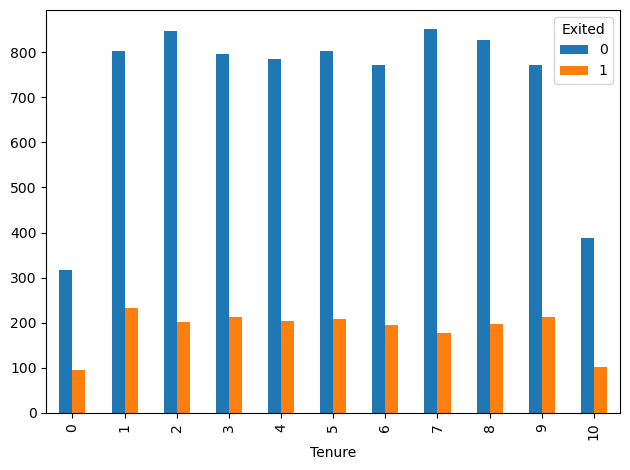

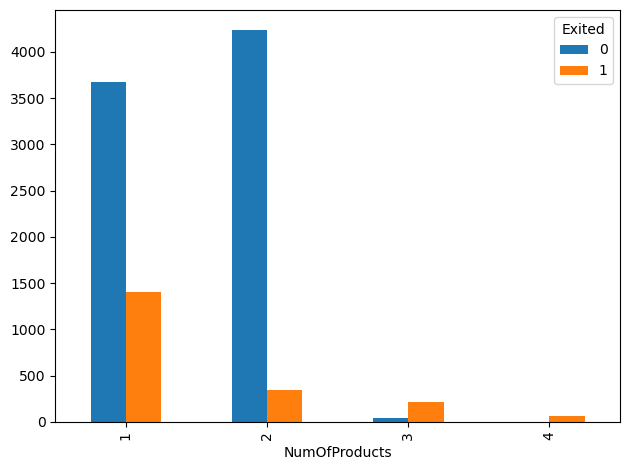

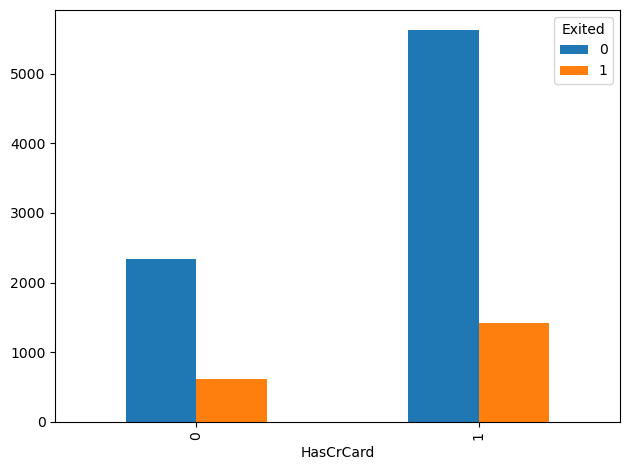

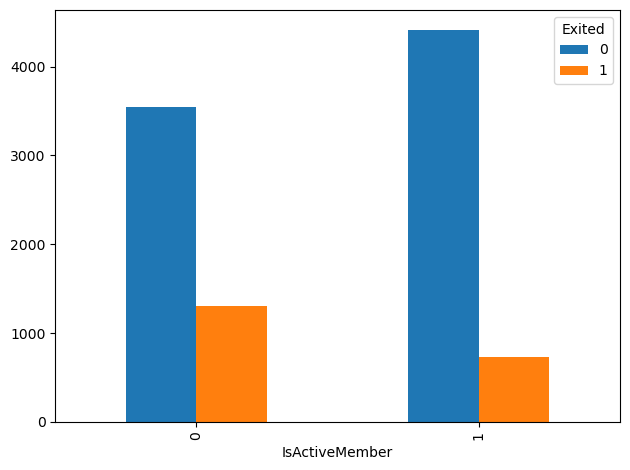

<Figure size 640x480 with 0 Axes>

In [14]:
# cat vs cat

plt.figure(figsize=(10,10))
for i in cat_cols:
    if i != 'Exited':
        pd.crosstab(data[i],data['Exited']).plot(kind='bar')
    plt.tight_layout()
    plt.show()

## Multivariate Analysis

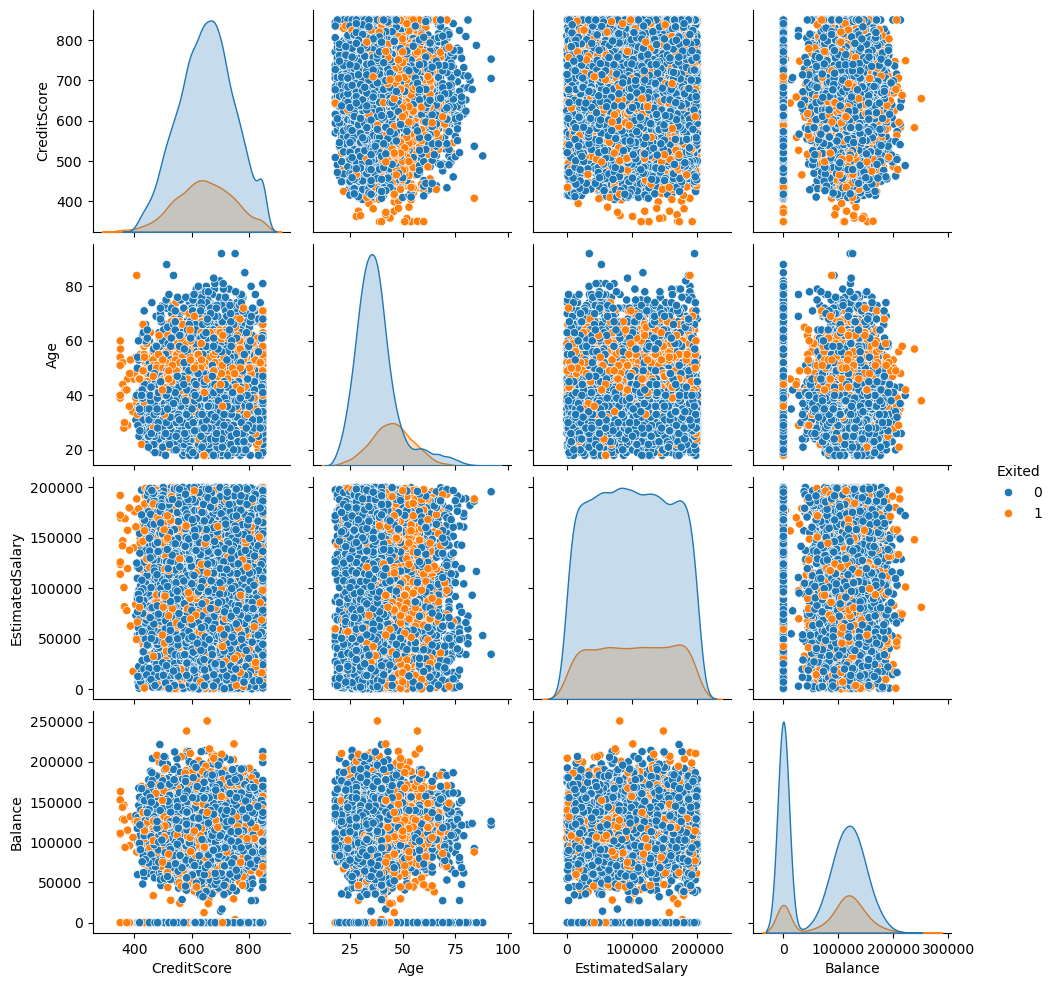

In [15]:
sns.pairplot(data=data,x_vars=num_cols,y_vars=num_cols,hue='Exited')
plt.show()

Inferences:

## Data Preprocessing

In [16]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
data.drop(columns=['RowNumber','Surname'],inplace=True)

In [19]:
data.set_index('CustomerId',inplace=True)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Missing Values Treatment

In [21]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We dont have any missing values in the data

## Train Test Split

In [22]:
#we are splitiing the data here because we dont want to include test data for outliers treatment

In [23]:
y = data['Exited']
x = data.drop(columns = 'Exited')

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=y,random_state=1)

In [25]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


## Outlier Treatment

**Cap the Outliers using IQR Method**

In [26]:
for i in num_cols:
    q3,q1=x_train[i].quantile([0.75,0.25])
    iqr=q3-q1
    ul,ll=q3+1.5*iqr,q1-1.5*iqr
    x_train[i] = x_train[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

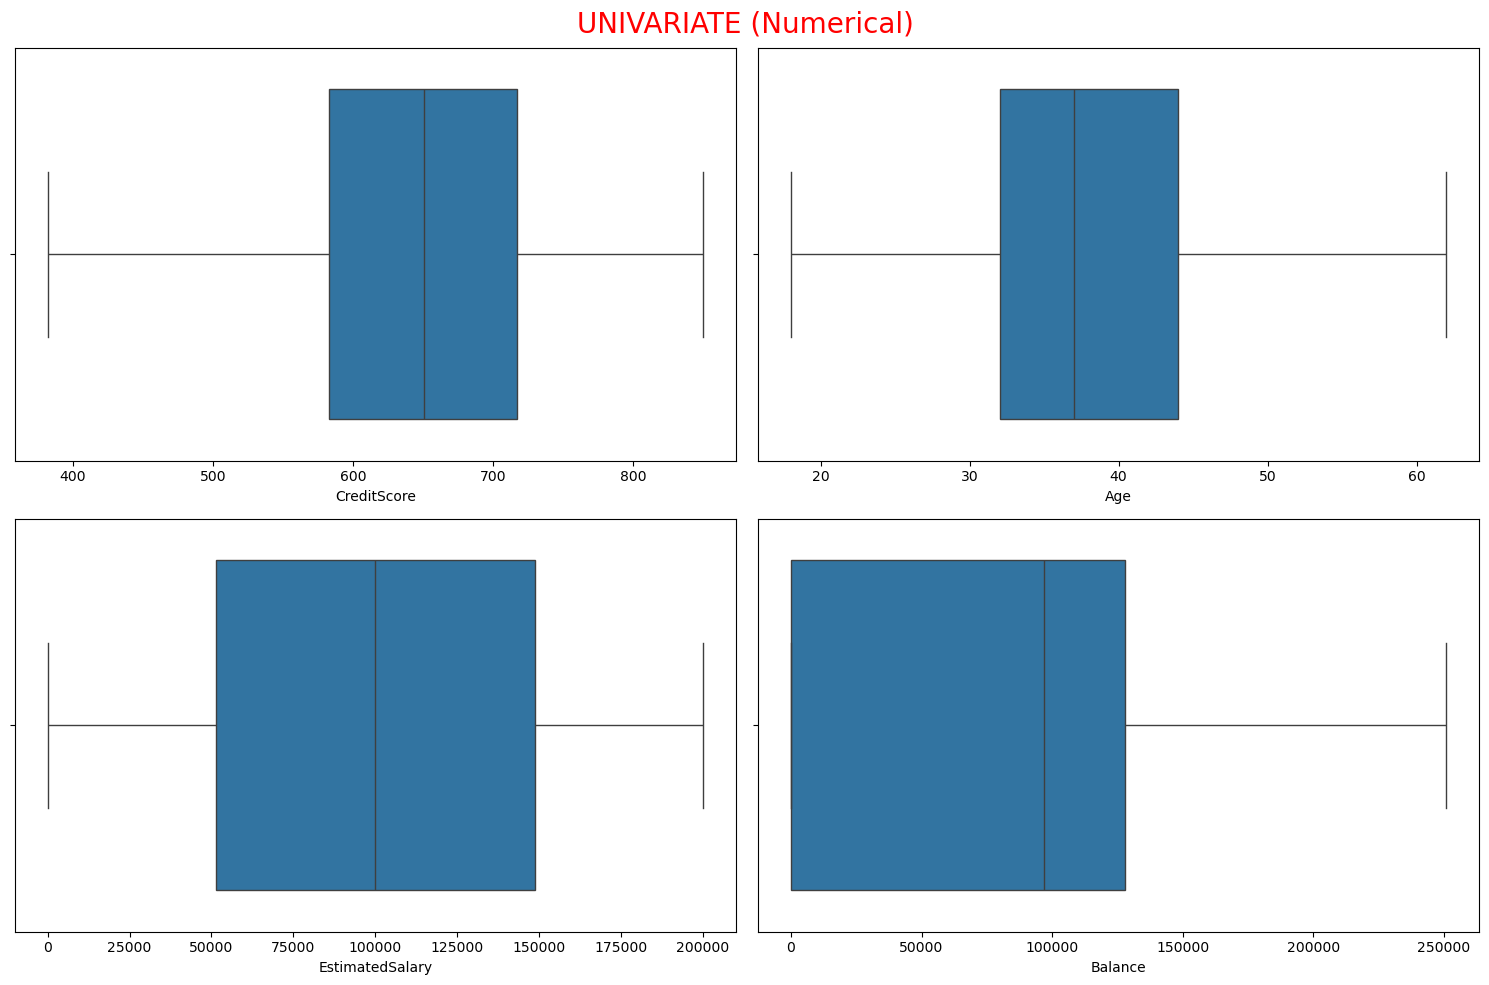

In [27]:
plt.figure(figsize=(15,10))
t=1
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=20)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=x_train,x=i)    
    t+=1
plt.tight_layout()
plt.show()

We can see that Outliers are capped

## Duplicates

In [ ]:
#to check if we have any duplicate rows or not
x_train.duplicated().value_counts()

False    8000
Name: count, dtype: int64

We dont have any duplicate data

## Feature Encoding

In [29]:
x_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CustomerId,,,,,,,,,,
15578462,596.0,Spain,Female,62.0,9,134208.25,1,1,1,13455.43
15747974,614.0,France,Male,49.0,1,0.00,2,1,0,192440.54


### Target Encoding on Geography

In [30]:
map_dict = round(x_train['Geography'].value_counts(normalize=True),4).to_dict()

In [31]:
map_dict

{'France': 0.5008, 'Germany': 0.2505, 'Spain': 0.2488}

In [32]:
x_train['Geography']=x_train['Geography'].map(map_dict)
x_test['Geography']=x_test['Geography'].map(map_dict)

### Dummy encoding on gender

In [33]:
x_train = pd.get_dummies(x_train,columns=['Gender'],drop_first=True,dtype=int)
x_test = pd.get_dummies(x_test,columns=['Gender'],drop_first=True,dtype=int)

In [ ]:
x_train.head(2)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
CustomerId,,,,,,,,,,
15578462,596.0,0.2488,62.0,9,134208.25,1,1,1,13455.43,0
15747974,614.0,0.5008,49.0,1,0.00,2,1,0,192440.54,1


In [35]:
x_test.head(2)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
CustomerId,,,,,,,,,,
15595160,413,0.2488,35,2,0.00,2,1,1,60972.84,1
15572792,535,0.2488,35,8,118989.92,1,1,1,135536.72,1


### Feature Scalling

In [36]:
x_train_s = x_train.copy()
x_test_s = x_test.copy()

In [37]:
#use standard scalar to numeric columns
scaler = StandardScaler()

x_train_s[num_cols] = scaler.fit_transform(x_train_s[num_cols])
x_test_s[num_cols] = scaler.fit_transform(x_test_s[num_cols])


In [ ]:
x_train_s.head(2)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
CustomerId,,,,,,,,,,
15578462,-0.557541,0.2488,2.382989,9,0.925750,1,1,1,-1.505216,0
15747974,-0.371218,0.5008,1.056207,1,-1.219862,2,1,0,1.614655,1


In [39]:
x_test_s.head(2)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
CustomerId,,,,,,,,,,
15595160,-2.494105,0.2488,-0.385107,2,-1.250284,2,1,1,-0.693331,1
15572792,-1.228033,0.2488,-0.385107,8,0.676315,1,1,1,0.591288,1


## Predictive Modelling

In [40]:
model_lr = LogisticRegression()

In [ ]:
model_lr.fit(x_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
pred_lr_s = model_lr.predict_proba(x_test)[:,1]
pred_lr_h = model_lr.predict(x_test)
print(pred_lr_h,pred_lr_s)

[0 0 0 ... 0 0 0] [0.37566326 0.22078553 0.12882533 ... 0.20917758 0.24624824 0.30983368]


In [43]:
print(confusion_matrix(y_test,pred_lr_h))

[[1542   51]
 [ 372   35]]


In [ ]:
print(classification_report(y_test,pred_lr_h))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1593
           1       0.41      0.09      0.14       407

    accuracy                           0.79      2000
   macro avg       0.61      0.53      0.51      2000
weighted avg       0.72      0.79      0.73      2000



In [45]:
print(cohen_kappa_score(y_test,pred_lr_h))
#Relaiblity is very low

0.07641518085231824


In [46]:
#Since the precision and recall of 1's is low we will improve it by reducing the threshold

In [47]:
pred_lr_h = (pred_lr_s>0.3).astype(int)

In [48]:
print(confusion_matrix(y_test,pred_lr_h))

[[1325  268]
 [ 241  166]]


In [ ]:
print(classification_report(y_test,pred_lr_h))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1593
           1       0.38      0.41      0.39       407

    accuracy                           0.75      2000
   macro avg       0.61      0.62      0.62      2000
weighted avg       0.75      0.75      0.75      2000



In [50]:
print(cohen_kappa_score(y_test,pred_lr_h))

0.23385142437406115


### Make ROC Curve

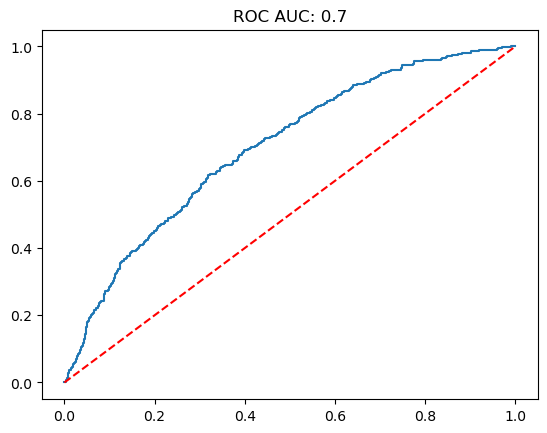

In [51]:
#Make the ROC Curve
fpr,tpr,thres = roc_curve(y_test,pred_lr_s)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,pred_lr_s),2)}')
plt.show()

In [52]:
#Since the ROC Curve is not good , we can fit this Logistic Regression Model as base model

### Yoden's Index

In [53]:
# Yoden's Index
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thres,'Yodens Index':tpr*(1-fpr)}).sort_values(by = 'Yodens Index',ascending=False)

,FPR,TPR,Thresholds,Yodens Index
333,0.318895,0.616708,0.217898,0.420043
335,0.323289,0.619165,0.216921,0.418995
331,0.318267,0.614251,0.218051,0.418755
332,0.318895,0.614251,0.218050,0.418369
341,0.345888,0.638821,0.210670,0.417860
...,...,...,...,...
4,0.004394,0.002457,0.686790,0.002446
0,0.000000,0.000000,inf,0.000000
1,0.000628,0.000000,0.780919,0.000000
2,0.001883,0.000000,0.729388,0.000000


In [54]:
#Yoden's Index is max when threshold is 0.208504

In [55]:
pred_lr_h = (pred_lr_s>0.208504).astype(int)
print(confusion_matrix(y_test,pred_lr_h))
print(classification_report(y_test,pred_lr_h))
print(cohen_kappa_score(y_test,pred_lr_h))

[[1032  561]
 [ 145  262]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1593
           1       0.32      0.64      0.43       407

    accuracy                           0.65      2000
   macro avg       0.60      0.65      0.59      2000
weighted avg       0.76      0.65      0.68      2000

0.21120755631877497


In [56]:
#Here the recall of 1's have improved but its precision has reduced

One possible reason of the above score is class imbalance. We have more data on class 0 and less data in class 1.
More data means more learning of the model.

We can use

* Class Weights - Assign higher weights to class 1 to improve its F1 score
* Oversampling/Undersampling

### Class Weights

Class Weights

weights = total_obs / (no_of_class * no_obs_class)   - this should be the weight assigned to the class

In [57]:
#weight of class 0
len(y_train)/(2*y_train.value_counts()[0])

0.6279434850863422

In [58]:
#weight of class 1
len(y_train)/(2*y_train.value_counts()[1])

2.4539877300613497

In [59]:
model_lr = LogisticRegression(class_weight={0:0.62,1:2.45})

In [60]:
model_lr.fit(x_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.62, 1: 2.45})

In [61]:
pred_lr_s = model_lr.predict_proba(x_test)[:,1]
pred_lr_h = model_lr.predict(x_test)
print(pred_lr_h,pred_lr_s)

[1 0 0 ... 0 0 1] [0.59839936 0.48871005 0.3622833  ... 0.49987734 0.49274102 0.61668528]


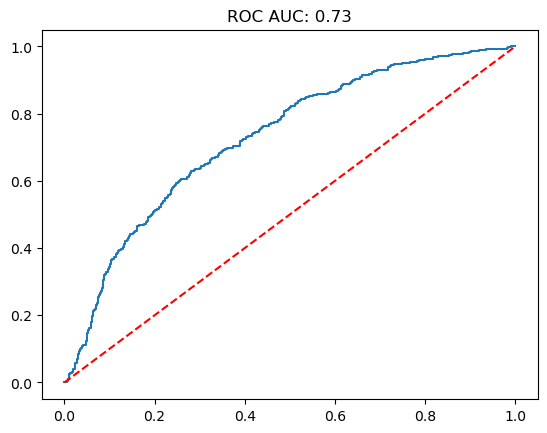

In [62]:
#Make the ROC Curve
fpr,tpr,thres = roc_curve(y_test,pred_lr_s)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,pred_lr_s),2)}')
plt.show()

In [63]:
# Yoden's Index
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thres,'Yodens Index':tpr*(1-fpr)}).sort_values(by = 'Yodens Index',ascending=False)

,FPR,TPR,Thresholds,Yodens Index
325,0.279975,0.628993,0.530008,0.452890
331,0.291902,0.636364,0.524484,0.450608
357,0.326428,0.668305,0.506261,0.450151
323,0.279347,0.624079,0.530938,0.449744
329,0.290647,0.633907,0.525163,0.449664
...,...,...,...,...
4,0.006277,0.002457,0.902512,0.002442
0,0.000000,0.000000,inf,0.000000
1,0.000628,0.000000,0.948682,0.000000
2,0.005022,0.000000,0.911136,0.000000


In [ ]:
pred_lr_h = (pred_lr_s>0.541026).astype(int)
print(confusion_matrix(y_test,pred_lr_h))
print(classification_report(y_test,pred_lr_h))
print(cohen_kappa_score(y_test,pred_lr_h))

[[1169  424]
 [ 161  246]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1593
           1       0.37      0.60      0.46       407

    accuracy                           0.71      2000
   macro avg       0.62      0.67      0.63      2000
weighted avg       0.77      0.71      0.73      2000

0.27266849846452235


### Sampling to treat class Imbalance

In [65]:
!pip install imblearn

In [66]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [67]:
#We always balance train data never the test data

In [68]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [69]:
sampler = RandomOverSampler()
x_train_os,y_train_os = sampler.fit_resample(x_train,y_train)

In [70]:
y_train_os.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [71]:
sampler = RandomUnderSampler()
x_train_us,y_train_us = sampler.fit_resample(x_train,y_train)

In [72]:
y_train_us.value_counts()

Exited
0    1630
1    1630
Name: count, dtype: int64

In [73]:
sampler = SMOTE()
x_train_sm,y_train_sm = sampler.fit_resample(x_train,y_train)

In [74]:
y_train_sm.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [75]:
x_train_sm.duplicated().sum()

0

In [76]:
y_train_sm.duplicated().sum()

12738

In [77]:
#passing sampling strategy
sampler = SMOTE(sampling_strategy=0.7)
x_train_sm1,y_train_sm1 = sampler.fit_resample(x_train,y_train)

In [78]:
y_train_sm1.value_counts(normalize=True)

Exited
0    0.588235
1    0.411765
Name: proportion, dtype: float64

In [79]:
x_train_sm1.duplicated().sum()

0

In [80]:
#Lets refit the Logistic Regression with Overfit data

In [81]:
model_lr = LogisticRegression()

In [82]:
model_lr.fit(x_train_sm1,y_train_sm1)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
pred_lr_s = model_lr.predict_proba(x_test)[:,1]
pred_lr_h = (pred_lr_s>0.5).astype(int)
print(confusion_matrix(y_test,pred_lr_h))
print(classification_report(y_test,pred_lr_h))
print(cohen_kappa_score(y_test,pred_lr_h))

[[1263  330]
 [ 199  208]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1593
           1       0.39      0.51      0.44       407

    accuracy                           0.74      2000
   macro avg       0.63      0.65      0.63      2000
weighted avg       0.77      0.74      0.75      2000

0.27138398477206305


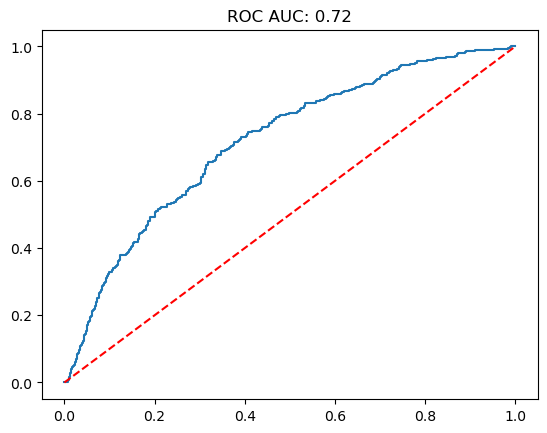

In [84]:
#Make the ROC Curve
fpr,tpr,thres = roc_curve(y_test,pred_lr_s)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,pred_lr_s),2)}')
plt.show()

### KNN (K-Nearest Neighbours)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
model_knn = KNeighborsClassifier(n_neighbors=7,weights='distance')

In [87]:
model_knn.fit(x_train_s,y_train)
#Always pass scalled data in KNN

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [88]:
#n neighbours is a hyper parameter so we need to tune it

In [89]:
pred_knn_s = model_knn.predict_proba(x_test_s)[:,1] #scalled data
pred_knn_h = (pred_knn_s>0.5).astype(int)

In [90]:
pred_knn_h

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
pred_knn_s

array([0.        , 0.        , 0.09430135, ..., 0.        , 0.        ,
       0.11651026])

In [92]:
print(confusion_matrix(y_test,pred_knn_h))

[[1531   62]
 [ 285  122]]


In [93]:
print(classification_report(y_test,pred_knn_h))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1593
           1       0.66      0.30      0.41       407

    accuracy                           0.83      2000
   macro avg       0.75      0.63      0.66      2000
weighted avg       0.81      0.83      0.80      2000



In [94]:
print(cohen_kappa_score(y_test,pred_knn_h))

0.3276653129553275


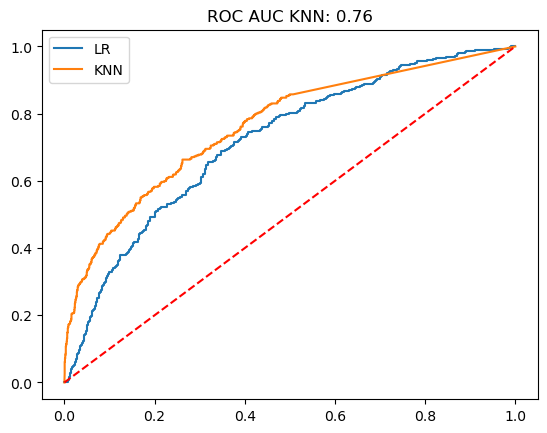

In [95]:
#Make the ROC Curve
fpr,tpr,thres = roc_curve(y_test,pred_lr_s)
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,pred_knn_s)
plt.plot(fpr,tpr,label='LR')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC KNN: {round(roc_auc_score(y_test,pred_knn_s),2)}')
plt.legend()
plt.show()

In [96]:
# Scale the train set
x_train_s_os = x_train_os.copy()
x_train_s_os[num_cols] = scaler.transform(x_train_os[num_cols])

In [97]:
model_knn = KNeighborsClassifier(n_neighbors=11,weights='distance')

In [98]:
model_knn.fit(x_train_s_os,y_train_os)
#Always pass scalled data in KNN

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [99]:
pred_knn_s = model_knn.predict_proba(x_test_s)[:,1] #scalled data
pred_knn_h = (pred_knn_s>0.5).astype(int)

In [100]:
print(confusion_matrix(y_test,pred_knn_h))

[[1183  410]
 [ 139  268]]


In [101]:
print(classification_report(y_test,pred_knn_h))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1593
           1       0.40      0.66      0.49       407

    accuracy                           0.73      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.73      0.75      2000



In [102]:
print(cohen_kappa_score(y_test,pred_knn_h))

0.3214297191534805


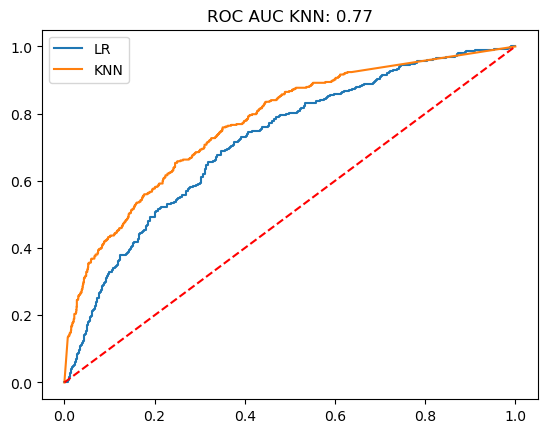

In [103]:
#Make the ROC Curve
fpr,tpr,thres = roc_curve(y_test,pred_lr_s)
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,pred_knn_s)
plt.plot(fpr,tpr,label='LR')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC KNN: {round(roc_auc_score(y_test,pred_knn_s),2)}')
plt.legend()
plt.show()

### Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [105]:
model_nb = GaussianNB()

In [106]:
model_nb.fit(x_train_os,y_train_os)

GaussianNB()

In [107]:
y_pred_nb_s = model_nb.predict_proba(x_test)[:,1]
y_pred_nb_h = (y_pred_nb_s>0.5).astype(int)

In [108]:
print(classification_report(y_test,y_pred_nb_h))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1593
           1       0.40      0.65      0.49       407

    accuracy                           0.73      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.73      0.75      2000



In [109]:
print(cohen_kappa_score(y_test,y_pred_nb_h))

0.3199139635215277


In [110]:
model_mnb = MultinomialNB()

In [111]:
model_mnb.fit(x_train_os,y_train_os)

MultinomialNB()

In [112]:
y_pred_mnb_s = model_mnb.predict_proba(x_test)[:,1]
y_pred_mnb_h = (y_pred_mnb_s>0.5).astype(int)

In [113]:
print(classification_report(y_test,y_pred_mnb_h))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67      1593
           1       0.25      0.57      0.35       407

    accuracy                           0.56      2000
   macro avg       0.54      0.56      0.51      2000
weighted avg       0.72      0.56      0.60      2000



In [114]:
print(cohen_kappa_score(y_test,y_pred_mnb_h))

0.08662753901382891


### Decison tree

In [115]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree

In [116]:
model_dt=DecisionTreeClassifier()

In [117]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [118]:
pred_dt_s=model_dt.predict(x_test)
pred_dt_h=(pred_dt_s>0.5).astype(int)

In [119]:
print(classification_report(y_test,pred_dt_h))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1593
           1       0.47      0.48      0.47       407

    accuracy                           0.78      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.79      0.78      0.78      2000



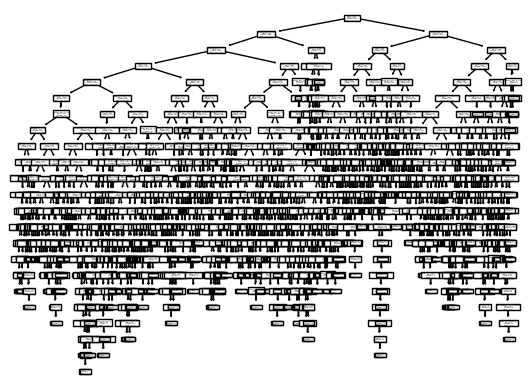

In [120]:
plot_tree(model_dt,feature_names=x_train.columns.to_list())
plt.show()

In [121]:
roc_auc_score(y_test,pred_dt_h)

0.6699048817692886

### hyper parameter tuning

In [122]:
dt=DecisionTreeClassifier(class_weight='balanced',)

In [123]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [124]:
y_pred_dt_s=dt.predict(x_test)
y_pred_dt_h=(y_pred_dt_s>0.5).astype(int)

In [125]:
print(classification_report(y_test,y_pred_dt_h))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1593
           1       0.46      0.40      0.43       407

    accuracy                           0.78      2000
   macro avg       0.65      0.64      0.65      2000
weighted avg       0.77      0.78      0.78      2000



In [126]:
print(roc_auc_score(y_test,y_pred_dt_h))

0.6396681735664785


In [127]:
# tune dt
grid={'max_depth':[4,5,6,7,8,9,10,15],
      'min_samples_split':[50,100,150,200,250,500]}

In [128]:
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),cv=5,scoring='roc_auc',verbose=3,param_grid=grid)

In [129]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .max_depth=4, min_samples_split=50;, score=0.823 total time=   0.0s
[CV 2/5] END .max_depth=4, min_samples_split=50;, score=0.812 total time=   0.0s
[CV 3/5] END .max_depth=4, min_samples_split=50;, score=0.811 total time=   0.0s
[CV 4/5] END .max_depth=4, min_samples_split=50;, score=0.796 total time=   0.0s
[CV 5/5] END .max_depth=4, min_samples_split=50;, score=0.832 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_split=100;, score=0.823 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_split=100;, score=0.815 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_split=100;, score=0.812 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_split=100;, score=0.795 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_split=100;, score=0.831 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_split=150;, score=0.823 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_split=150

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 15],
                         'min_samples_split': [50, 100, 150, 200, 250, 500]},
             scoring='roc_auc', verbose=3)

In [130]:
gscv.best_score_

0.8353603451762961

In [131]:
gscv.best_params_

{'max_depth': 6, 'min_samples_split': 200}

In [132]:
model_dt_final=DecisionTreeClassifier(class_weight='balanced',max_depth=6,min_samples_split=200)

In [133]:
model_dt_final.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=200)

In [134]:
y_pred_dt_s=model_dt_final.predict(x_test)
y_pred_dt_h=(y_pred_dt_s>0.5).astype(int)

In [135]:
print(classification_report(y_test,y_pred_dt_h))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1593
           1       0.46      0.68      0.55       407

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.79      2000



In [136]:
print(roc_auc_score(y_test,y_pred_dt_h))

0.7392006798786459


In [137]:
print(cohen_kappa_score(y_test,y_pred_dt_h))

0.4053624544546848


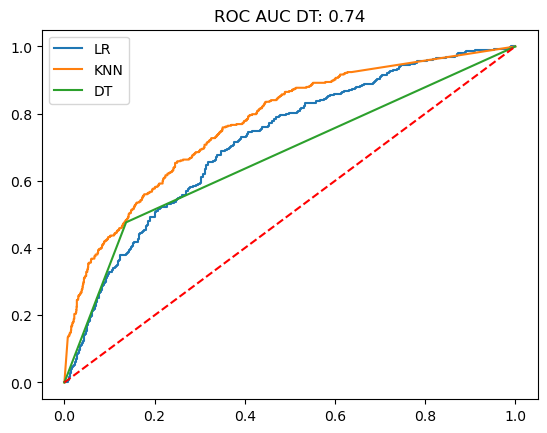

In [138]:
fpr,tpr,thres = roc_curve(y_test,pred_lr_s)
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,pred_knn_s)
fpr_dt,tpr_dt,thres_dt=roc_curve(y_test,pred_dt_h)
plt.plot(fpr,tpr,label='LR')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_dt,tpr_dt,label='DT')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC DT: {round(roc_auc_score(y_test,y_pred_dt_h),2)}')
plt.legend()
plt.show()

In [139]:
pd.DataFrame(model_dt_final.feature_importances_,index=x_train.columns).sort_values(by=0,ascending=False)

,0
Age,0.465235
NumOfProducts,0.353485
IsActiveMember,0.079229
Balance,0.061009
Geography,0.021857
Gender_Male,0.015747
EstimatedSalary,0.002432
Tenure,0.001007
CreditScore,0.000000
HasCrCard,0.000000


### Ensemble techniques

#### Baging

In [140]:
model_bagg=BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',max_depth=5)\
                             ,n_estimators=4)

In [141]:
model_bagg.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=5),
                  n_estimators=4)

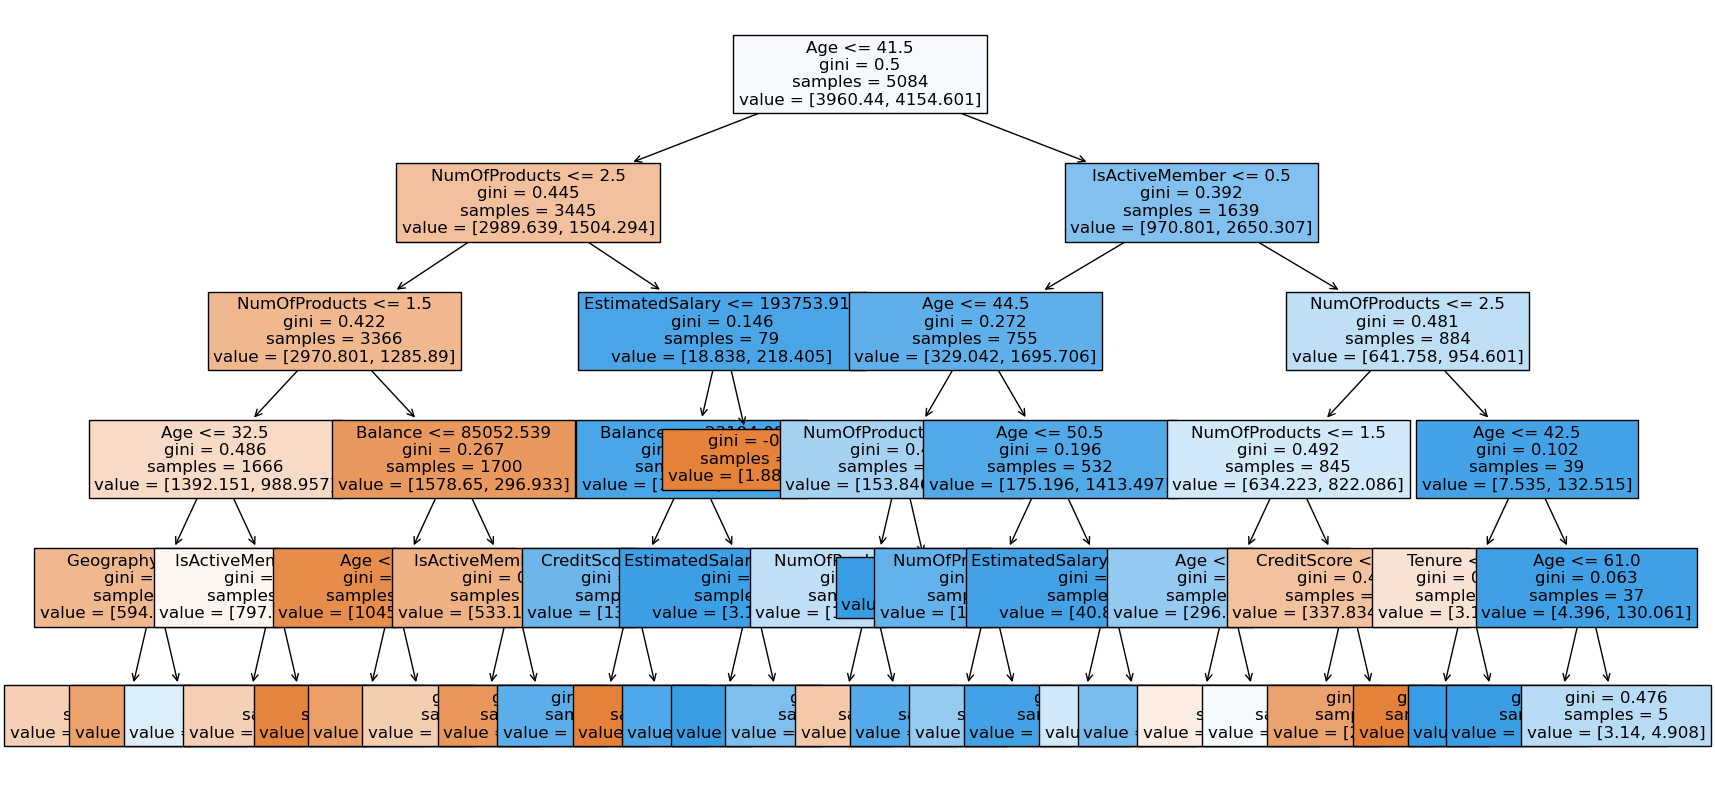

In [142]:
plt.figure(figsize=(20,10))
plot_tree(model_bagg[0],feature_names=x_train.columns.to_list(),fontsize=12,filled=True)
plt.show()

In [143]:
pred_bagg_s=model_bagg.predict_proba(x_test)[:,1]
pred_bagg_h=(pred_bagg_s>0.5).astype(int)

In [144]:
print(classification_report(y_test,pred_bagg_h))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1593
           1       0.51      0.64      0.57       407

    accuracy                           0.80      2000
   macro avg       0.71      0.74      0.72      2000
weighted avg       0.82      0.80      0.81      2000



In [145]:
print(roc_auc_score(y_test,pred_bagg_h))

0.7427712766695816


#### Random Forest

Special case of bagging where base model tree

In [146]:
model_rf=RandomForestClassifier(criterion='entropy',max_depth=5,max_features=None,\
                                oob_score=True,max_samples=0.8,class_weight='balanced')

In [147]:

model_rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=None, max_samples=0.8,
                       oob_score=True)

In [148]:
model_rf.oob_score_

0.796875

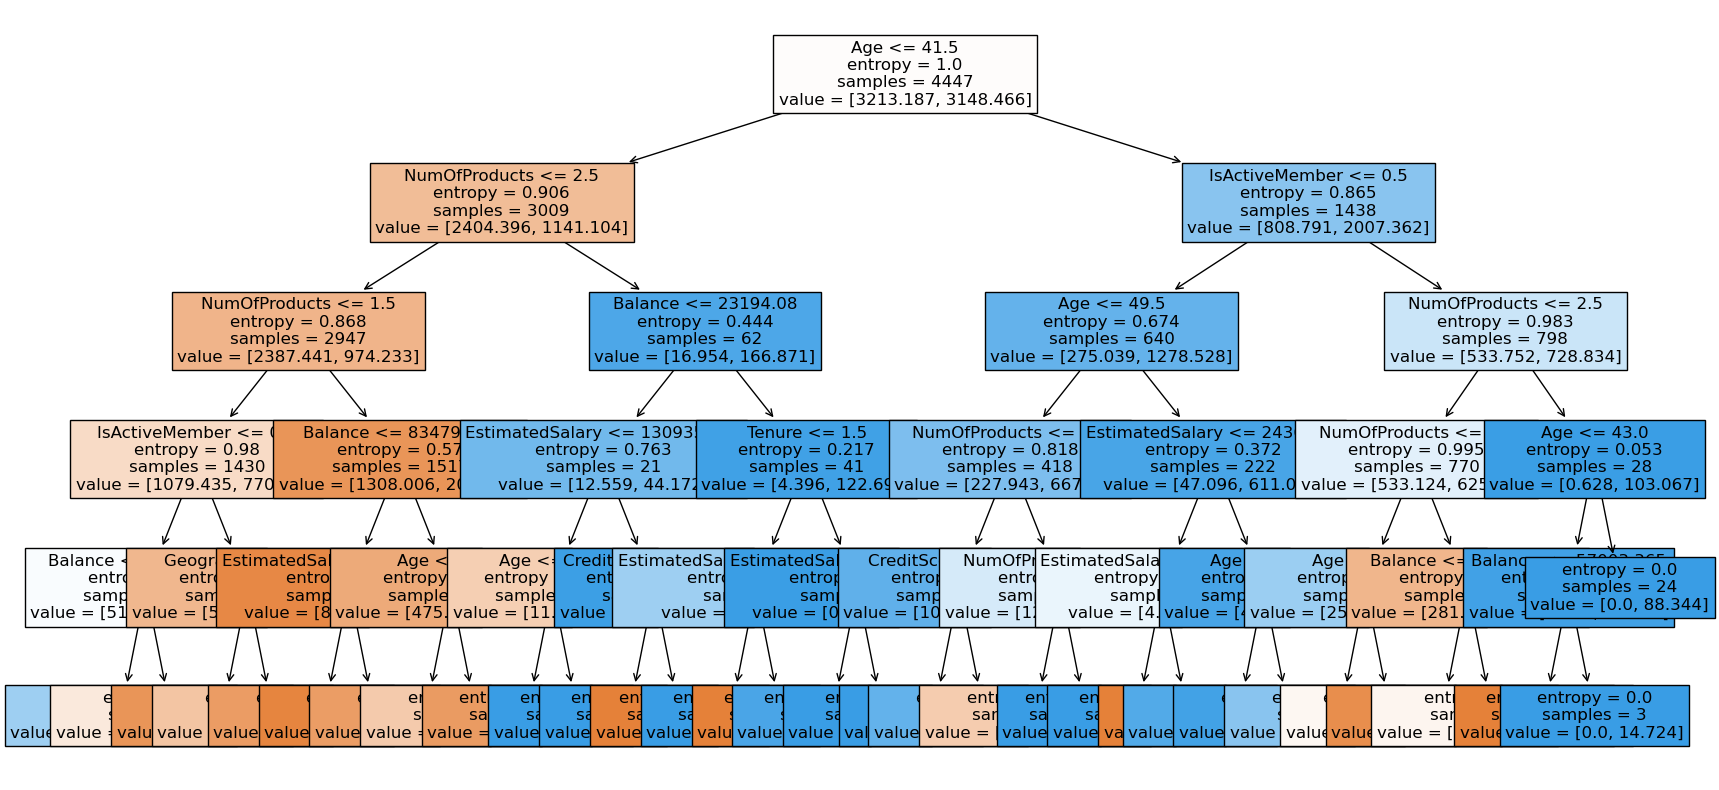

In [149]:
plt.figure(figsize=(20,10))
plot_tree(model_rf[0],feature_names=x_train.columns.to_list(),fontsize=12,filled=True)
plt.show()

In [150]:
pred_rf_s=model_rf.predict_proba(x_test)[:,1]
pred_rf_h=(pred_rf_s>0.5).astype(int)

In [151]:
print(classification_report(y_test,pred_rf_h))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1593
           1       0.50      0.68      0.58       407

    accuracy                           0.80      2000
   macro avg       0.71      0.75      0.72      2000
weighted avg       0.83      0.80      0.81      2000



In [152]:
print(roc_auc_score(y_test,pred_rf_h))

0.7533789567687873


In [153]:
print(cohen_kappa_score(y_test,pred_rf_h))

0.4485070786300588


In [157]:
# fine tuning model
grid={'n_estimators':[75,100,125],
      'max_depth':[7,8,9],
      'max_features':[7,8]}

In [158]:
gscv=GridSearchCV(estimator=RandomForestClassifier(),cv=5,scoring='roc_auc',param_grid=grid,verbose=0)

In [159]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9], 'max_features': [7, 8],
                         'n_estimators': [75, 100, 125]},
             scoring='roc_auc')

In [160]:
gscv.best_params_

{'max_depth': 8, 'max_features': 7, 'n_estimators': 100}

In [161]:
gscv.best_score_

0.8542535466286563

In [162]:
model_rf_final=RandomForestClassifier(**gscv.best_params_)

In [163]:
model_rf_final.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=7)

In [164]:
y_pred_rf_s=model_rf_final.predict_proba(x_test)[:,1]
y_pred_rf_h=(y_pred_rf_s>0.5).astype(int)

In [165]:
print(classification_report(y_test,y_pred_rf_h))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.82      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [166]:
print(cohen_kappa_score(y_test,y_pred_rf_h))

0.4937269012898713


In [167]:
print(roc_auc_score(y_test,y_pred_rf_h))

0.703060533569008


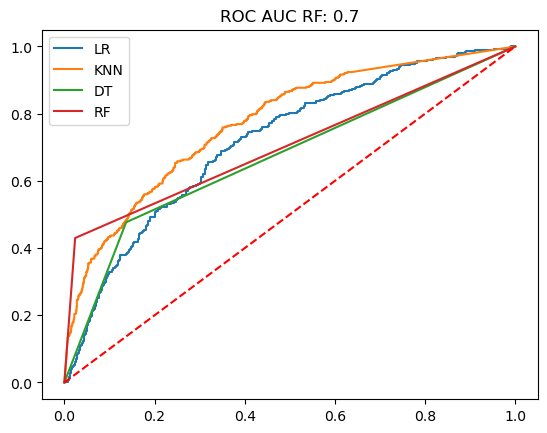

In [168]:
fpr,tpr,thres = roc_curve(y_test,pred_lr_s)
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,pred_knn_s)
fpr_dt,tpr_dt,thres_dt=roc_curve(y_test,pred_dt_h)
fpr_rf,tpr_rf,thres_rf=roc_curve(y_test,y_pred_rf_h)
plt.plot(fpr,tpr,label='LR')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_dt,tpr_dt,label='DT')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC RF: {round(roc_auc_score(y_test,y_pred_rf_h),2)}')
plt.legend()
plt.show()

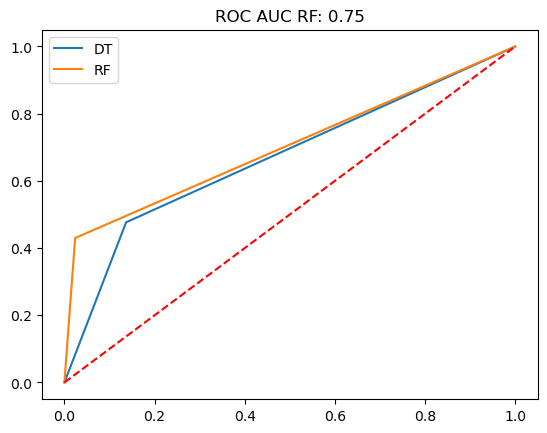

In [169]:
fpr_dt,tpr_dt,thres_dt=roc_curve(y_test,pred_dt_h)
fpr_rf,tpr_rf,thres_rf=roc_curve(y_test,y_pred_rf_h)
plt.plot(fpr_dt,tpr_dt,label='DT')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC RF: {round(roc_auc_score(y_test,pred_rf_h),2)}')
plt.legend()
plt.show()

# Ada Boost

In [170]:
from sklearn.ensemble import AdaBoostClassifier

In [171]:
model_ada=AdaBoostClassifier(n_estimators=100)

In [172]:
model_ada.fit(x_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

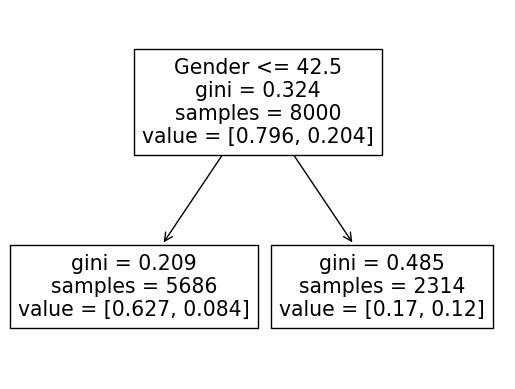

In [173]:
plot_tree(model_ada[0],feature_names=x.columns.to_list())
plt.show()

In [174]:
pred_ada_s=model_ada.predict_proba(x_test)[:,1]
pred_ada_h=(pred_ada_s>0.5).astype(int)

In [175]:
print(classification_report(y_test,pred_ada_h))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1593
           1       0.73      0.47      0.57       407

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [176]:
print(roc_auc_score(y_test,pred_ada_h))
print(cohen_kappa_score(y_test,pred_ada_h))

0.7126726109776957
0.49089756894688785


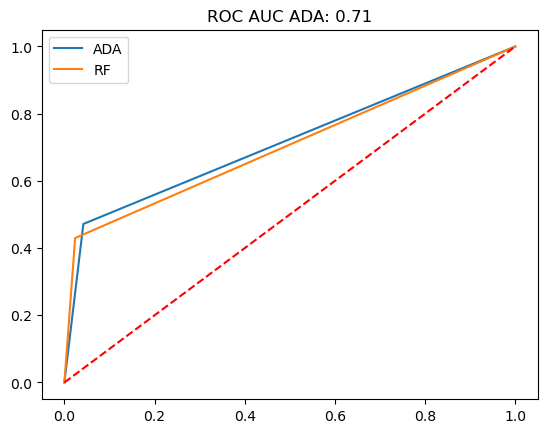

In [314]:
fpr_ada,tpr_ada,thres_ada=roc_curve(y_test,pred_ada_h)
fpr_rf,tpr_rf,thres_rf=roc_curve(y_test,y_pred_rf_h)
plt.plot(fpr_ada,tpr_ada,label='ADA')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC ADA: {round(roc_auc_score(y_test,pred_ada_h),2)}')
plt.legend()
plt.show()

In [178]:
grid={'n_estimators':[70,100,120],
      'learning_rate':[0.1,1]}

In [179]:
gscv=GridSearchCV(estimator=AdaBoostClassifier(),cv=5,scoring='recall',param_grid=grid,verbose=0)

In [180]:
gscv.fit(x_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Li

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 1],
                         'n_estimators': [70, 100, 120]},
             scoring='recall')

In [181]:
gscv.best_params_

{'learning_rate': 1, 'n_estimators': 120}

In [182]:
gscv.best_score_

0.46441717791411047

In [183]:
model_ada=AdaBoostClassifier(n_estimators=120,learning_rate=1)

In [184]:
model_ada.fit(x_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=120)

In [185]:
pred_ada_s=model_ada.predict_proba(x_test)[:,1]
pred_ada_h=(pred_ada_s>0.5).astype(int)

In [186]:
print(classification_report(y_test,pred_ada_h))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.74      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



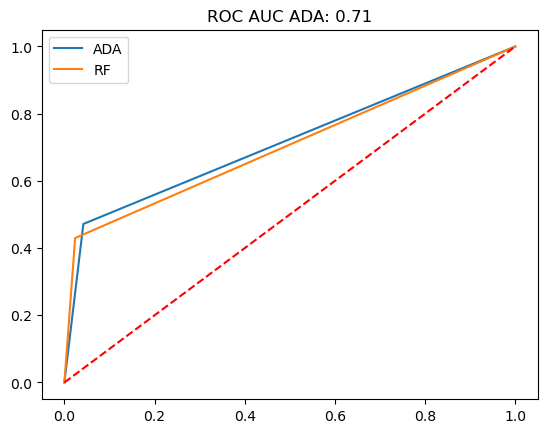

In [313]:
fpr_ada,tpr_ada,thres_ada=roc_curve(y_test,pred_ada_h)
fpr_rf,tpr_rf,thres_rf=roc_curve(y_test,y_pred_rf_h)
plt.plot(fpr_ada,tpr_ada,label='ADA')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC ADA: {round(roc_auc_score(y_test,pred_ada_h),2)}')
plt.legend()
plt.show()

In [188]:
## lets check variance in the model

# kfold cross validation 

from sklearn.model_selection import cross_val_score

In [189]:
cv_scores=cross_val_score(AdaBoostClassifier(n_estimators=120,learning_rate=1),x_train,y_train,cv=5,scoring='roc_auc')

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Li

In [190]:
cv_scores

array([0.85777128, 0.84460927, 0.8494609 , 0.82777422, 0.84214974])

In [191]:
# %ge variation 
(cv_scores.std()/cv_scores.mean())*100

1.1675404176017645

In [193]:
pd.DataFrame(model_rf_final.feature_importances_,index=x_train.columns)

,0
CreditScore,0.054721
Geography,0.032780
Age,0.345300
Tenure,0.027763
Balance,0.087092
NumOfProducts,0.277433
HasCrCard,0.004701
IsActiveMember,0.098613
EstimatedSalary,0.058966
Gender_Male,0.012632


#### gradient boosting

In [194]:
from sklearn.ensemble import GradientBoostingClassifier

In [195]:
model_gbc=GradientBoostingClassifier()

In [196]:
model_gbc.fit(x_train,y_train)

GradientBoostingClassifier()

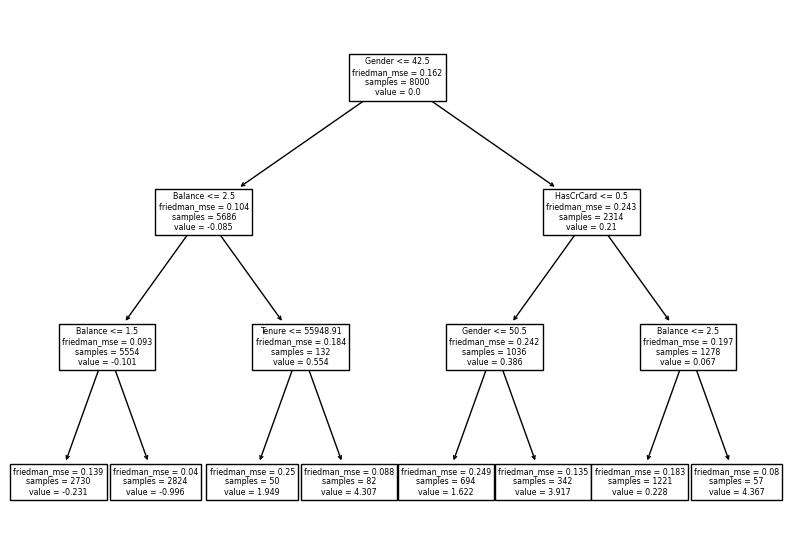

In [201]:
plt.figure(figsize=(10,7))
plot_tree(model_gbc[0][0],feature_names=x.columns.to_list())
plt.show()

In [220]:
model_gbm=GradientBoostingClassifier(learning_rate=0.01,n_estimators=170,max_leaf_nodes=10)

In [221]:
model_gbm.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_leaf_nodes=10,
                           n_estimators=170)

In [222]:
pred_gbm_s=model_gbm.predict_proba(x_test)[:,1]
pred_gbm_h=(pred_gbm_s>0.5).astype(int)

In [223]:
print(classification_report(y_test,pred_gbm_h))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1593
           1       0.87      0.32      0.47       407

    accuracy                           0.85      2000
   macro avg       0.86      0.65      0.69      2000
weighted avg       0.85      0.85      0.82      2000



In [224]:
print(cohen_kappa_score(y_test,pred_gbm_h))

0.4038784153638255


In [225]:
model_gbm.fit(x_train_os,y_train_os)

GradientBoostingClassifier(learning_rate=0.01, max_leaf_nodes=10,
                           n_estimators=170)

In [226]:
pred_gbm_s=model_gbm.predict_proba(x_test)[:,1]
pred_gbm_h=(pred_gbm_s>0.5).astype(int)

In [227]:
print(classification_report(y_test,pred_gbm_h))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.49      0.70      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



In [278]:
grid={'n_estimators':[250,350],
      'min_samples_split':[400,700]}

In [279]:
gscv=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,max_leaf_nodes=15),cv=5,scoring='roc_auc',param_grid=grid,verbose=0)

In [280]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_leaf_nodes=15),
             param_grid={'min_samples_split': [400, 700],
                         'n_estimators': [250, 350]},
             scoring='roc_auc')

In [281]:
gscv.best_params_

{'min_samples_split': 400, 'n_estimators': 350}

In [282]:
gscv.best_score_

0.8542208011094953

In [283]:
model_gbm=GradientBoostingClassifier(**gscv.best_params_)

In [284]:
model_gbm.fit(x_train_os,y_train_os)

GradientBoostingClassifier(min_samples_split=400, n_estimators=350)

In [285]:
pred_gbm_s=model_gbm.predict_proba(x_test)[:,1]
pred_gbm_h=(pred_gbm_s>0.5).astype(int)

In [286]:
print(classification_report(y_test,pred_gbm_h))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.51      0.71      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



In [287]:
print(roc_auc_score(y_test,pred_gbm_s))

0.853366463535955


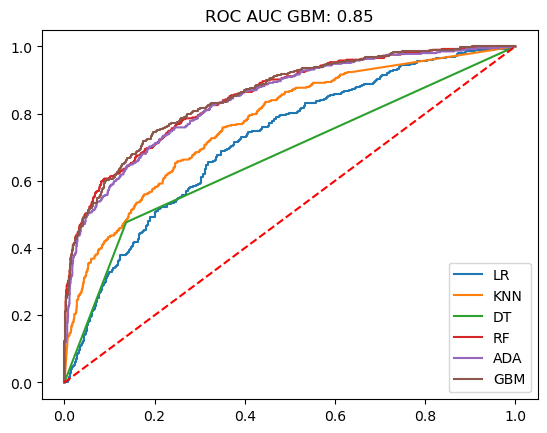

In [312]:
fpr,tpr,thres = roc_curve(y_test,pred_lr_s)
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,pred_knn_s)
fpr_dt,tpr_dt,thres_dt=roc_curve(y_test,pred_dt_s)
fpr_rf,tpr_rf,thres_rf=roc_curve(y_test,y_pred_rf_s)
fpr_ada,tpr_ada,thres_ada = roc_curve(y_test,pred_ada_s)
fpr_gbm,tpr_gbm,thres_gbm=roc_curve(y_test,pred_gbm_s)
plt.plot(fpr,tpr,label='LR')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_dt,tpr_dt,label='DT')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot(fpr_ada,tpr_ada,label='ADA')
plt.plot(fpr_gbm,tpr_gbm,label='GBM')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC GBM: {round(roc_auc_score(y_test,pred_gbm_s),2)}')
plt.legend()
plt.show()

# XG boost

In [295]:
from xgboost import XGBClassifier

In [304]:
model_xgb=XGBClassifier(n_estimators=500,gamma=4,min_child_rate=1)

In [305]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_rate=1, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [306]:
pred_xgb_s=model_xgb.predict_proba(x_test)[:,1]
pred_xgb_h=(pred_xgb_s>0.5).astype(int)

In [307]:
print(classification_report(y_test,pred_xgb_h))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [309]:
print(roc_auc_score(y_test,pred_xgb_s))

0.8570866706459928


In [310]:
print(cohen_kappa_score(y_test,pred_xgb_h))

0.4862400081909066


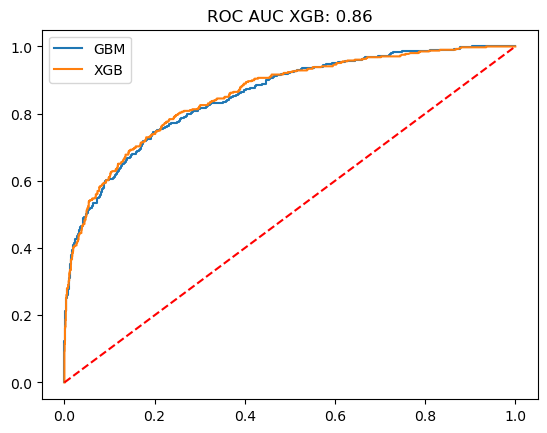

In [311]:
fpr_gbm,tpr_gbm,thres_gbm=roc_curve(y_test,pred_gbm_s)
fpr_xgb,tpr_xgb,thres_xgb=roc_curve(y_test,pred_xgb_s)
plt.plot(fpr_gbm,tpr_gbm,label='GBM')
plt.plot(fpr_xgb,tpr_xgb,label='XGB')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC XGB: {round(roc_auc_score(y_test,pred_xgb_s),2)}')
plt.legend()
plt.show()

# voting and stacking

In [315]:
from sklearn.ensemble import VotingClassifier,StackingClassifier